**Membros:**<br>
Felipe Ferreira Alexandre - 13693144<br>
Gabriela Montoro Furtado - 14573166<br>
Geovana Rodrigues Vasconcelos - 14573826<br> 
Julia Aragão Ferraz - 14584078<br>


# 1. Introdução

A relação entre o consumo de energia e o crescimento econômico tem sido um tópico central nas pesquisas sobre desenvolvimento sustentável e políticas energéticas. Este estudo explora a correlação entre o consumo de energia primária e o Produto Interno Bruto (PIB) per capita, representando respectivamente a demanda por energia e o nível de renda de uma nação. Paralelamente, avaliamos se o nível de renda (PIB per capita) está associado à participação de fontes renováveis no total do consumo de energia, estabelecendo um vínculo hipotético onde o investimento em energia sustentável pode gerar aumento no PIB e, consequentemente, maior demanda energética.

A fundamentação teórica sustenta-se na ideia de que o aumento da renda de um país geralmente acarreta um crescimento no consumo de energia, impulsionado por demandas industriais, comerciais e domésticas mais elevadas. Isso reflete um aumento no padrão de vida e, por conseguinte, em um maior uso de energia. Em paralelo, espera-se que a expansão e os investimentos em energias renováveis contribuam para o desenvolvimento econômico, através da geração de empregos, aumento da produção nacional de energia e redução da dependência de combustíveis fósseis importados.

O modelo Cobb-Douglas é utilizado para descrever a produção, consideraremos a energia como um elemento íntriseco de K. De acordo com o princípio de equilíbrio do mercado, um aumento no consumo, impulsionado pelo crescimento da renda, leva a um aumento na produção. A longo prazo, com K sendo variável, isso implica em um maior dispêndio de energia na fabricação e disponibilização de bens e serviços.

\begin {equation}
Y = A \cdot K^{\alpha} \cdot L^{\beta}
\end {equation}

Neste estudo, o modelo de demanda por energia examina a relação entre o PIB e o consumo de energia, destacando que a demanda por energia não é meramente uma função do tamanho e crescimento da economia, mas também é influenciada por fatores como eficiência energética, políticas governamentais, avanços tecnológicos e mudanças comportamentais dos consumidores. Contudo, o foco deste projeto é entender até que ponto a renda, medida pelo PIB per capita, afeta essa demanda.

**Fonte:** [Global Data on Sustainable Energy](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy ) <br>


# 2. Carga das Ferramentas

In [74]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [75]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# 3. Análise dos Dados

A primeira fase do projeto é a análise da estrutura dos dados: quais são as informações disponíveis, como estão elencadas e qual seu comportamento.

In [76]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [77]:
# Análise estistíca de todos os campos
data.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2010.0,6.0,2000.0,2005.0,2010.0,2015.0,2.020000e+03
Access to electricity (% of population),3639.0,79.0,30.0,1.0,60.0,98.0,100.0,1.000000e+02
Access to clean fuels for cooking,3480.0,63.0,39.0,0.0,23.0,83.0,100.0,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,113.0,244.0,0.0,4.0,33.0,112.0,3.060000e+03
Financial flows to developing countries (US $),1560.0,94224000.0,298154407.0,0.0,260000.0,5665000.0,55347500.0,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,33.0,30.0,0.0,7.0,23.0,55.0,9.600000e+01
Electricity from fossil fuels (TWh),3628.0,70.0,348.0,0.0,0.0,3.0,27.0,5.184000e+03
Electricity from nuclear (TWh),3523.0,13.0,73.0,0.0,0.0,0.0,0.0,8.090000e+02
Electricity from renewables (TWh),3628.0,24.0,104.0,0.0,0.0,1.0,10.0,2.185000e+03
Low-carbon electricity (% electricity),3607.0,37.0,34.0,0.0,3.0,28.0,64.0,1.000000e+02


In [78]:
# Quantidade e nome dos países
nomes_paises = data['Entity'].unique()
quantidade_paises = len(data['Entity'].unique())

print('Temos', quantidade_paises, 'em nosso dataframe, sendo a lista completa deles: \n', nomes_paises)

Temos 176 em nosso dataframe, sendo a lista completa deles: 
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Keny

Observamos que o dataset possui um volume gigantesco de informações, muitas das quais não precisamos.
Por isso, vamos criar um novo dataframe a partir dele, selecionando apenas as colunas que irão interessar para a nossa análise

In [79]:
# Dataframe reduzido
colunas_reduzidas = ['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)', 'gdp_per_capita', 'Renewable energy share in the total final energy consumption (%)']
data = data[colunas_reduzidas]

# Alterando o nome das colunas
data.columns = ['Pais', 'Ano', 'Consumo energia primaria per capita', 'PIB per capita', 'Renováveis %']

In [80]:
# Avaliando a quantidade de valores nulos
nulos = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulos = nulos.rename(columns = {0 : 'Null Values'})
print(nulos)

                                     Null Values
PIB per capita                               282
Renováveis %                                 194
Pais                                           0
Ano                                            0
Consumo energia primaria per capita            0


In [81]:
# Calculando o número de informações faltantes por país para cada coluna de interesse
colunas_interesse = ['Pais', 'Ano', 'Consumo energia primaria per capita', 'PIB per capita', 'Renováveis %']
valores_faltantes_pais = data[colunas_interesse].isnull().sum(axis=1).groupby(data['Pais']).sum()
valores_faltantes_pais = valores_faltantes_pais.sort_values(ascending=False)

# Exibindo o total de dados faltantes por coluna
print(valores_faltantes_pais.head(20))

Pais
Saint Vincent and the Grenadines    22
Egypt                               22
Slovakia                            22
Congo                               22
Czechia                             22
Bahamas                             22
Saint Lucia                         22
Saint Kitts and Nevis               22
Gambia                              22
Kyrgyzstan                          22
Yemen                               22
Albania                             21
Somalia                             14
Nauru                               11
Eritrea                             10
Cayman Islands                       7
South Sudan                          6
Afghanistan                          3
Aruba                                3
New Caledonia                        2
dtype: int64


In [82]:
# Remoção das informações faltantes
# Lista de países a serem removidos
paises_a_remover = [
    "Saint Vincent and the Grenadines", "Egypt", "Slovakia",
    "Congo", "Czechia", "Bahamas", "Saint Lucia",
    "Saint Kitts and Nevis", "Gambia",  "Kyrgyzstan",  
    "Yemen", "Albania", "Somalia", "Nauru",
    "Eritrea", "Cayman Islands", "South Sudan", 
]

# Removendo os países especificados do dataframe
data = data[~data['Pais'].isin(paises_a_remover)]

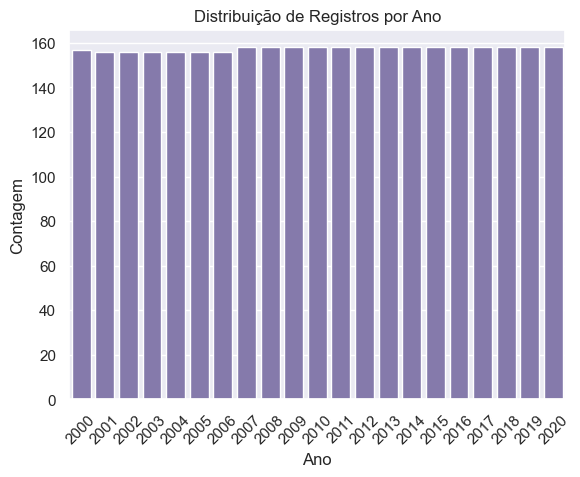

,count,mean,std,min,25%,50%,75%,max
Ano,3305.0,2010.0,6.0,2000.0,2005.0,2010.0,2015.0,2020.0
Consumo energia primaria per capita,3305.0,26642.0,36029.0,0.0,3133.0,13959.0,34099.0,262586.0
PIB per capita,3297.0,13145.0,19355.0,112.0,1354.0,4592.0,15838.0,123514.0
Renováveis %,3148.0,33.0,30.0,0.0,7.0,25.0,55.0,96.0


In [83]:
# Estatísticas descritivas das variáveis numéricas
estatisticas_numericas = data.describe().round(0).T

# Visualização da distribuição das principais variáveis categóricas
# Distribuição de registros por ano
sns.set_theme(style="darkgrid")
sns.countplot(x=data['Ano'], color='m')
plt.title('Distribuição de Registros por Ano')
plt.ylabel('Contagem')
plt.xlabel('Ano')
plt.xticks(rotation=45)

plt.show()

estatisticas_numericas

**Analisando as estatísticas básicas**

Uma breve varredura dos principais indicadores de nossa base de dados mostra que temos dados bastante dispersos e desiguais.

A participação das renováveis no consumo de energia, por exemplo, que tem uma média global de 32,6%, varia de 0% a 96% entre os países analisados.  

O PIB per capita, conforme se sabe, é também bastante desigual entre os vários países, com um desvio padrão bastante alto, de US$ 19.709 para uma média de US$ 13.284

E o consumo de nergia primaria per capita possui valores extremamente dispersos, com média de 26.642 kWh/pessoa

Os dados abrangem de 2000 a 2020. A distribuição de registros por ano é bastante uniforme, indicando que a maioria dos anos tem uma quantidade similar de dados.

In [84]:
# Definindo as variáveis chave para uso futuro no código
variáveis_chave = ['Consumo energia primaria per capita', 'PIB per capita', 'Renováveis %']

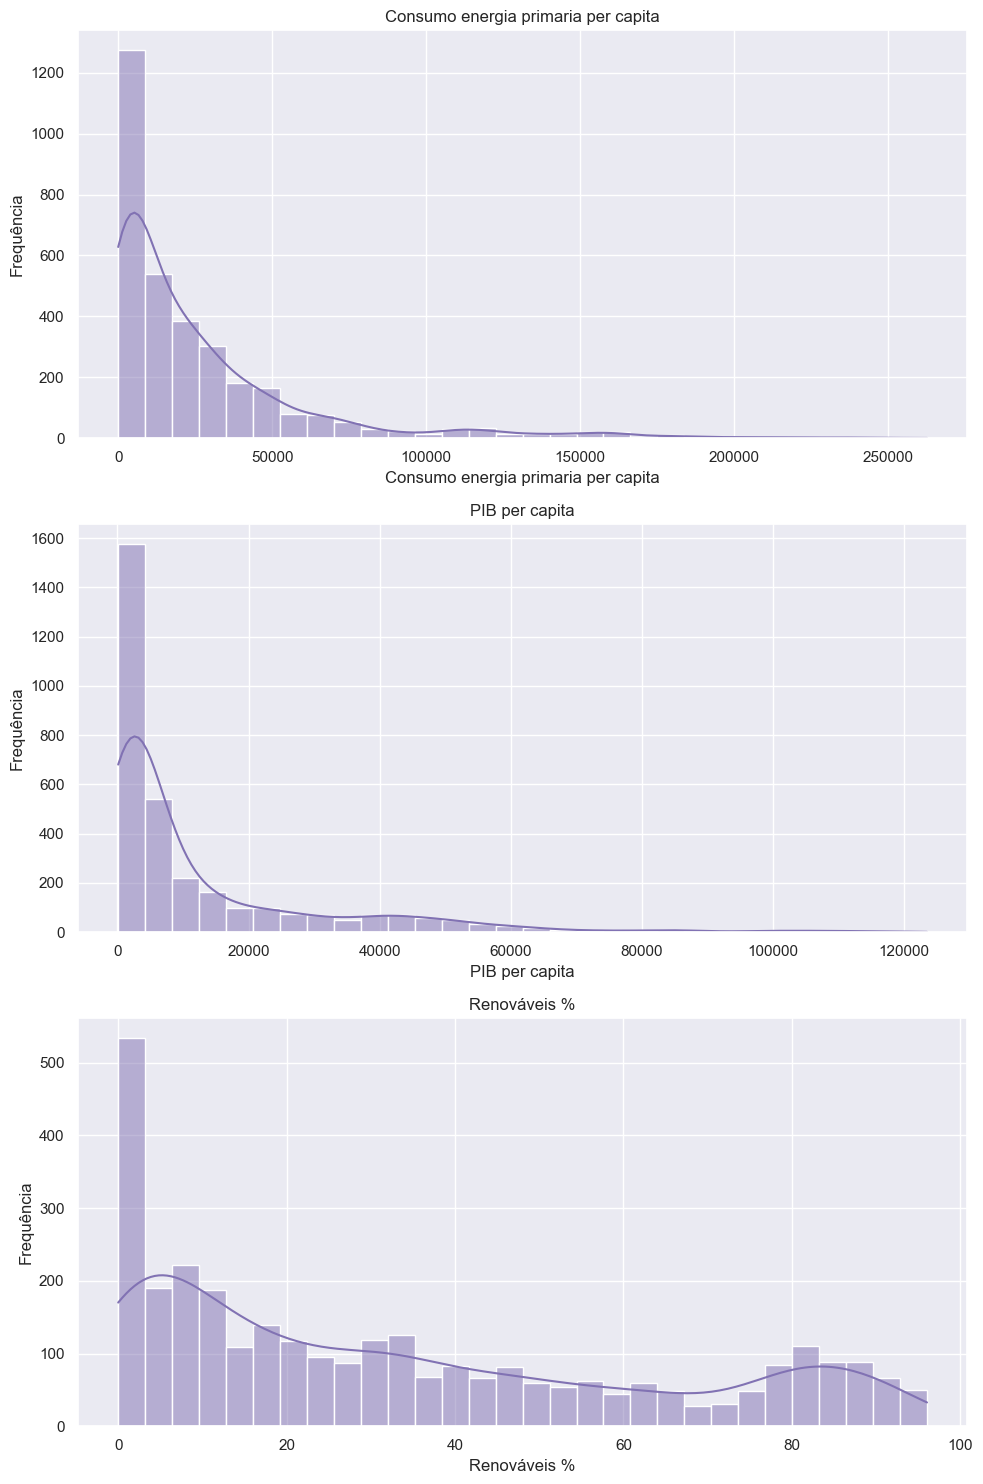

In [85]:
# Visualização Gráfica das Principais Variáveis
# Criando histogramas para cada variável selecionada
fig, axes = plt.subplots(len(variáveis_chave), 1, figsize=(10, 5 * len(variáveis_chave)))

for i, col in enumerate(variáveis_chave):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True, color='m')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

Há uma assimetria à direita para os dados analisados, isso indica que a vasta maioria dos países possuem baixo consumo de energia primária per capita e baixo PIB per capita. A assimetria se repete no dado de uso de energia renovável, porém com maior dispersão do que nos outros casos. 

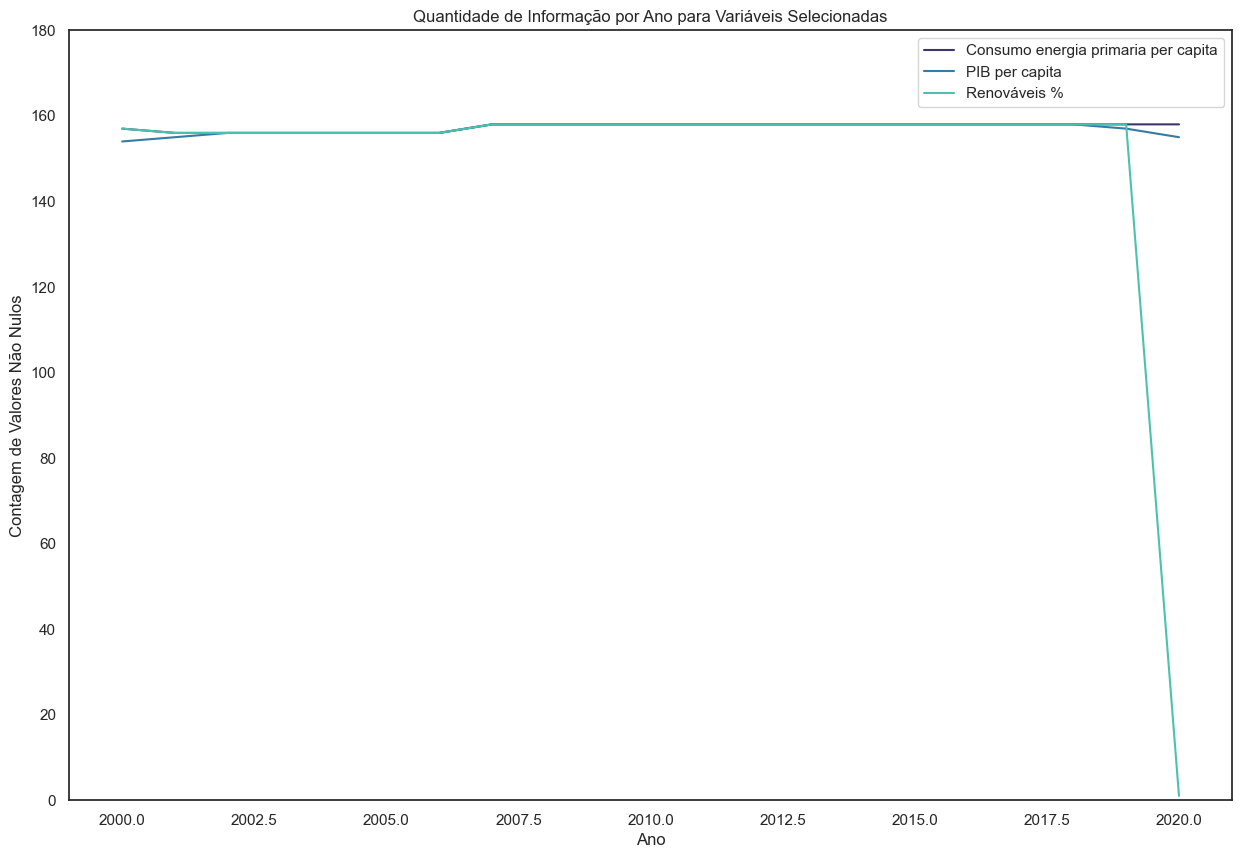

In [86]:
# Contagem de informações não nulas por ano para cada variável
contagem_info = data.groupby('Ano')[variáveis_chave].count()

# Definindo a paleta de cores do seaborn
cores = sns.color_palette("mako", len(variáveis_chave))

# Plotando o gráfico
sns.set_theme(style="white")
plt.figure(figsize=(15, 10))
for var, color in zip(variáveis_chave, cores):
    plt.plot(contagem_info.index, contagem_info[var], label=var, color=color)

plt.xlabel('Ano')
plt.ylabel('Contagem de Valores Não Nulos')
plt.ylim(bottom=0, top=180)
plt.title('Quantidade de Informação por Ano para Variáveis Selecionadas')
plt.legend()
plt.grid(False)
plt.show()

Não temos dados do percentual de uso de energia renovável para 2020, portanto iremos remover esse ano de nossa análise.

In [87]:
data = data[data['Ano'] != 2020]

In [88]:
# Calculando a quantidade de informações não nulas por país para as variáveis-chave
quantidade_info_por_pais = data.groupby('Pais')[variáveis_chave].count().sum(axis=1)

# Ordenando os países pela quantidade de informações não nulas, do maior para o menor
paises_por_quantidade_info = quantidade_info_por_pais.sort_values(ascending=False)

# Exibindo os resultados
print(paises_por_quantidade_info)

Pais
Latvia             60
North Macedonia    60
Nepal              60
Netherlands        60
New Caledonia      60
                   ..
Aruba              59
Afghanistan        58
Serbia             39
Montenegro         39
French Guiana       2
Length: 159, dtype: int64


C:\Users\Felipe\AppData\Local\Temp\ipykernel_1284\4076083685.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


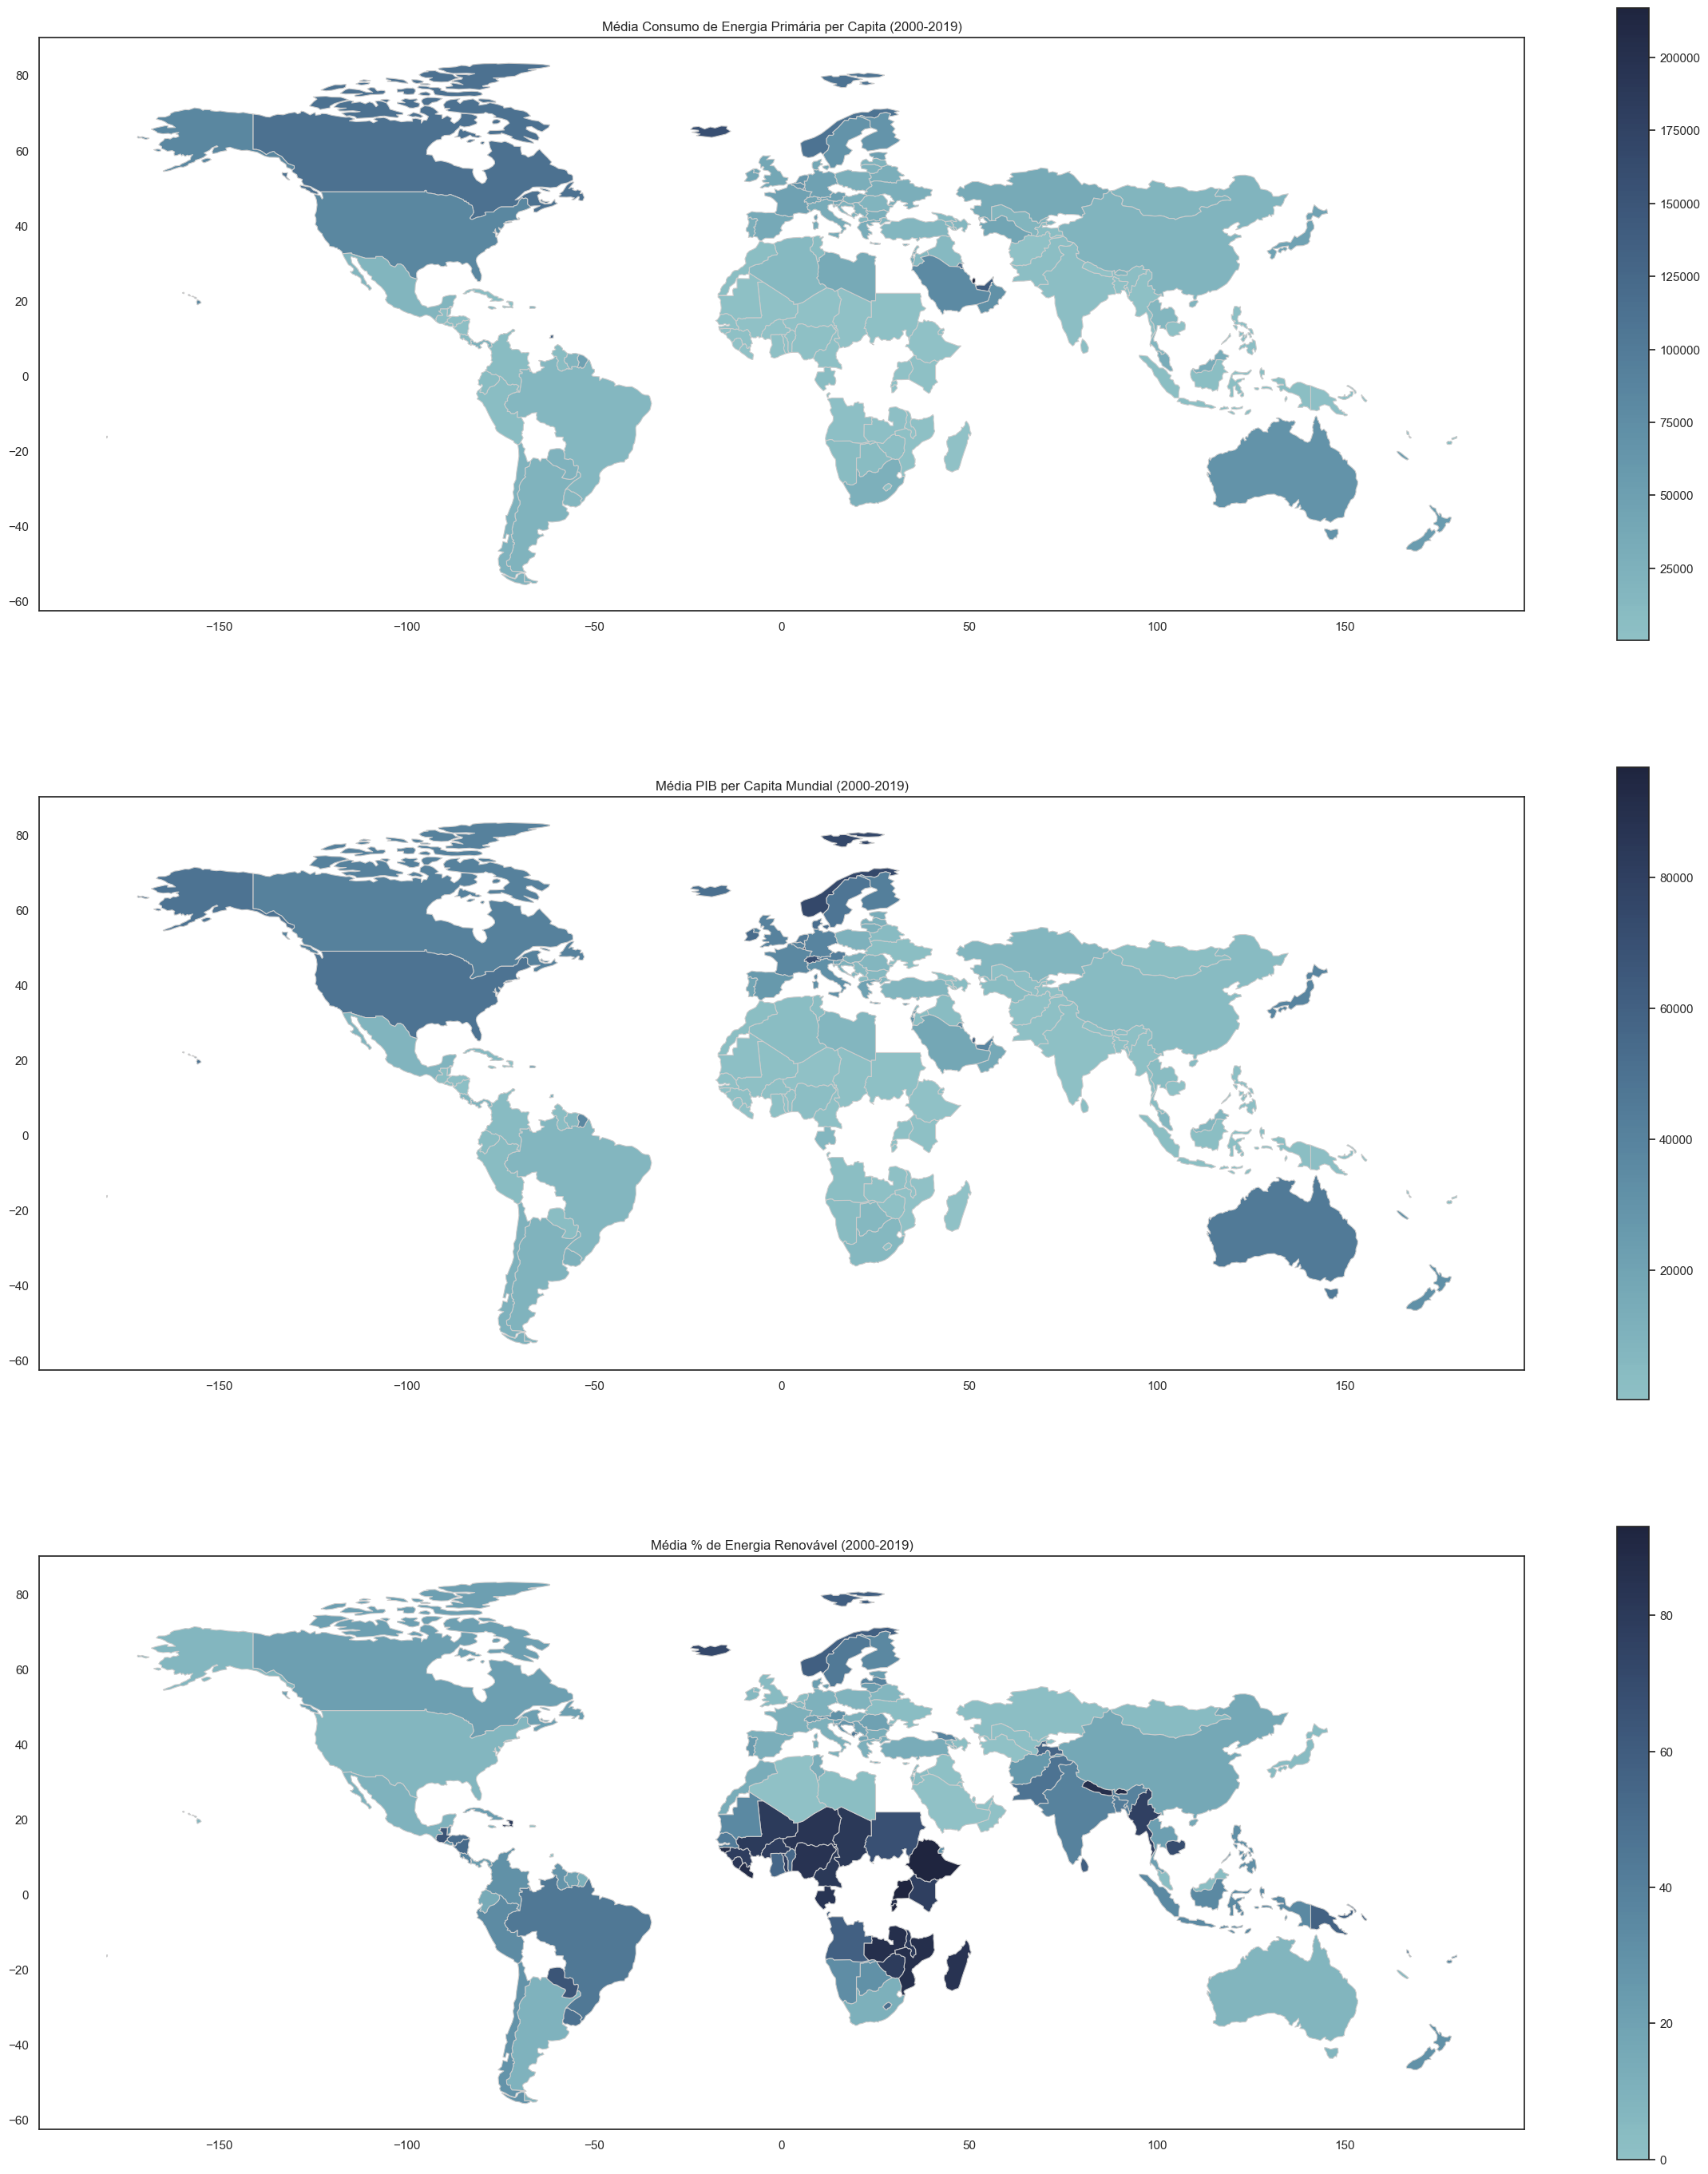

In [89]:
# Carregando um mapa mundial
# Esse argumento é obsoleto, mas foi escolhido para facilitar a interação entre vários usuários, tendo em vista que a alternativa seria colocar o path direto de uma máquina e alterar toda vez realizassemos o commit.
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mudando nome dos EUA
data['Pais'] = data['Pais'].replace('United States', 'United States of America')

# Definindo a paleta de cores
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Calculando a média do uso de energia primária per capita por país
media_uso_energia_primaria_per_capita = data.groupby('Pais')['Consumo energia primaria per capita'].mean()
uso_energia_mundial = mundo.set_index('name').join(media_uso_energia_primaria_per_capita)

# Calculando a média do PIB per capita por país
media_pib_per_capta = data.groupby('Pais')['PIB per capita'].mean()
pib_per_capta_mundial = mundo.set_index('name').join(media_pib_per_capta)

# Calculando a média do percentual de energia renovável por país
media_energia_renovavel = data.groupby('Pais')['Renováveis %'].mean()
energia_renovavel_mundial = mundo.set_index('name').join(media_energia_renovavel)

# Plotando os mapas
fig, axs = plt.subplots(3, 1, figsize=(30, 35))

# Mapa do Consumo de Energia Primária per Capita
uso_energia_mundial.plot(column='Consumo energia primaria per capita',
                         cmap=cores_mapa,
                         linewidth=0.8,
                         ax=axs[0],
                         edgecolor='0.8',
                         legend=True)
axs[0].set_title('Média Consumo de Energia Primária per Capita (2000-2019)')

# Mapa do PIB per Capita Mundial
pib_per_capta_mundial.plot(column='PIB per capita',
                           cmap=cores_mapa,
                           linewidth=0.8,
                           ax=axs[1],
                           edgecolor='0.8',
                           legend=True)
axs[1].set_title('Média PIB per Capita Mundial (2000-2019)')

# Mapa do Percentual de Energia Renovável
energia_renovavel_mundial.plot(column='Renováveis %',
                               cmap=cores_mapa,
                               linewidth=0.8,
                               ax=axs[2],
                               edgecolor='0.8',
                               legend=True)
axs[2].set_title('Média % de Energia Renovável (2000-2019)')

plt.show()

Essa ferramenta visual resume a maior parte das informações relevantes. Por meio dela conseguimos traçar bem como as variáveis de interesse estão distribuídas, na média, para cada país, entender quais continentes possuem maiores concentrações e afins. Por meio do mapa, podemos observar que há uma vasta quantidade de países e informações para realização da análise. Os países que estão vazios no mapa ou que não aparecem não possuem dados suficientes para a anãlise.

Algumas descrições inciais são:
- America do Norte possui alto PIB per capita e um grande consumo energético.
- Europa concentra PIB per capita e participação de energia renovável altos, além de possuir um consumo energético significativo.
- África, América Latina e sul da Ásia são focos de uso da energia renovável, mas essas regiões possuem baixo nível de renda, e consumo energético. 

# 4. Verificação da Hipótese - Premissas

Vamos definir que a hipótese (A) será a de que o crescimento no PIB gera um incremento no consumo de energia. Portanto, a hipótese (B) será a de que o uso de energia renovável aumenta o PIB.

**Países**
Por conta das altas dispersões desta base de dados, trabalharemos, com grupos de países que tenham maior semelhança econômica entre si, de maneira a podermos testar melhor a hipótese, com menos distorções.

Para isso, criamos dois grupo com as 10 maiores economias emergentes e desenvolvidas (a lista segue o [ranking](https://https://databankfiles.worldbank.org/public/ddpext_download/GDP.pdf) das maiores economias do mundo em 2022 do Banco Mundial)

In [90]:
# Segregação de países emergentes e desenvolvidos
emergentes_list = ['Brazil', 'India', 'China', 'Russia', 'South Africa', 'Mexico', 'Indonesia', 'Saudi Arabia', 'Turkey', 'Argentina', 'Thailand']
desenvolvidos_list = ['United States of America', 'Japan', 'Germany', 'United Kingdom', 'France', 'Canada', 'Italy', 'Australia', 'Netherlands', 'Switzerland', 'Sweden']

emergentes = data[data['Pais'].isin(emergentes_list)].reset_index(drop=True)
desenvolvidos = data[data['Pais'].isin(desenvolvidos_list)].reset_index(drop=True)

In [91]:
# Vejamos como estão os maiores emergentes
emergentes.groupby(by='Pais').mean().round(0).sort_values(by='PIB per capita', ascending=True)

,Ano,Consumo energia primaria per capita,PIB per capita,Renováveis %
Pais,,,,
India,2010.0,4949.0,1195.0,39.0
Indonesia,2010.0,6823.0,2506.0,35.0
Thailand,2010.0,16985.0,4597.0,22.0
China,2010.0,19934.0,4795.0,16.0
South Africa,2010.0,26527.0,6135.0,12.0
Brazil,2010.0,15349.0,7936.0,45.0
Turkey,2010.0,17219.0,8861.0,14.0
Mexico,2010.0,18468.0,9026.0,10.0
Argentina,2010.0,21037.0,9272.0,10.0


In [92]:
# Vejamos como estão os maiores desenvolvidos
desenvolvidos.groupby(by='Pais').mean().round(0).sort_values(by='PIB per capita', ascending=True)

,Ano,Consumo energia primaria per capita,PIB per capita,Renováveis %
Pais,,,,
Italy,2010.0,33919.0,32263.0,12.0
France,2010.0,47952.0,36866.0,11.0
Germany,2010.0,47456.0,39235.0,11.0
Japan,2010.0,45318.0,39347.0,5.0
United Kingdom,2010.0,39602.0,40776.0,5.0
Canada,2010.0,114142.0,41095.0,22.0
Australia,2010.0,68565.0,45246.0,8.0
Netherlands,2010.0,64362.0,45621.0,4.0
Sweden,2010.0,67583.0,48519.0,44.0


# 4. Verificação da Hipótese - Correlação

Começaremos analisando se há alguma correlação entre as variáveis, é importante ressaltar que correlação no implica necessariamente em causalidade, mas dado que temos um bom período de tempo e muitos países, isso pode servir como uma evidência de que as variáveis são pelo menos relacionadas.

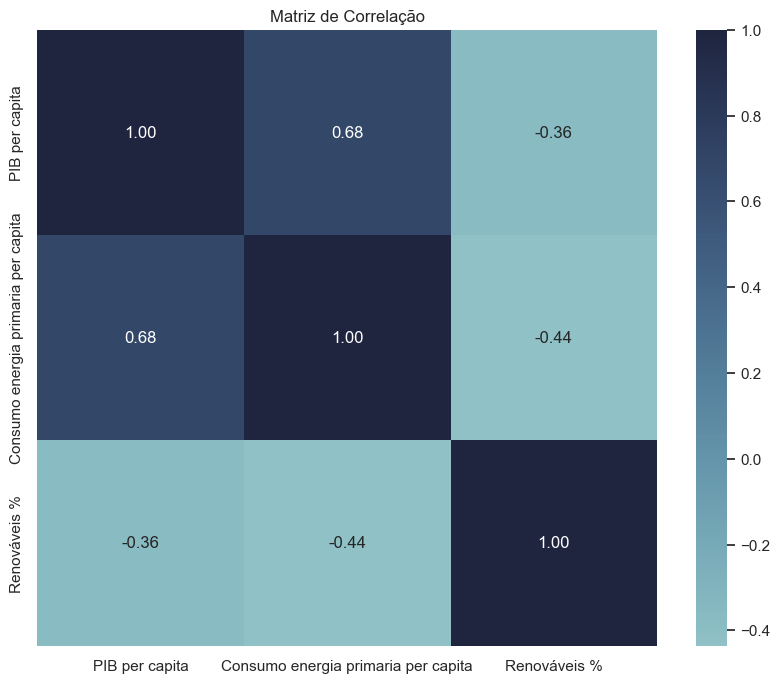

In [93]:
# Matriz de correlação
matriz_correlacao = data[['PIB per capita', 'Consumo energia primaria per capita', 'Renováveis %']].corr()

# Criando matrizes de correlação
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap=cores_mapa, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

A matriz sugere correlação positiva forte entre as variáveis PIB per capita e consumo de energia, favorecendo a primeira hipótese. Mas possui um coeficiente negativo para hipótese B, o que indica que há um relação inversa à proposta. Precisamos olhar melhor os dados para entender o motivo de cada uma dessas correlações. 

Esse resultado parece bem razoável olhando apenas para os mapas: com exceção da Europa, a maior concentração de energia renovável estava em países com menor nível de renda.

# 4. Verificação da Hipótese - Regressão Linear

**Hipótese A**

Agora vejamos como o consumo de energia se comporta ao regredirmos ele em relação PIB per capita.

In [94]:
# Filtrando o dataset para os últimos 5 anos (2014-2019)
data_recente = data[data['Ano'] >= 2014]

# Variável independente
x_var = 'PIB per capita'

# Variável dependente
y_var = 'Consumo energia primaria per capita'

# Preparando os dados
data_filtrada = data_recente[[x_var, y_var, 'Pais', 'Renováveis %']].dropna()

data_filtrada['Status'] = data_filtrada['Pais'].apply(lambda x: 'Emergente' if x in emergentes_list else ('Desenvolvido' if x in desenvolvidos_list else 'Outro'))

# Filtrando apenas emergentes e desenvolvidos
data_filtrada = data_filtrada[data_filtrada['Status'] != 'Outro']

# Criando e ajustando o modelo
X = data_filtrada[[x_var]]
y = data_filtrada[y_var]
model = LinearRegression()
model.fit(X, y)

# Coeficiente beta
beta = model.coef_[0]

# Fazendo previsões
y_pred = model.predict(X)

# Calculando R²
r2 = r2_score(y, y_pred)

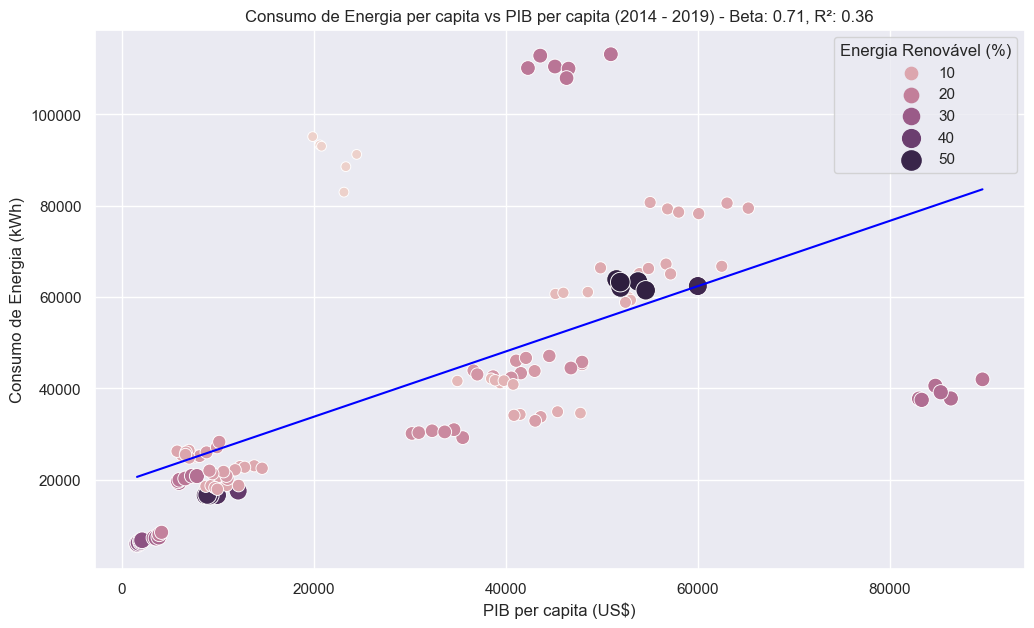

In [95]:
# Plotando gráfico de dispersão com linha de regressão
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 7))

sns.scatterplot(data=data_filtrada, x=X[x_var], y=y, hue='Renováveis %', size='Renováveis %', sizes=(50, 200))
sns.lineplot(x=X[x_var], y=y_pred, color='blue')

plt.title(f'Consumo de Energia per capita vs PIB per capita (2014 - 2019) - Beta: {beta:.2f}, R²: {r2:.2f}')
plt.xlabel('PIB per capita (US$)')
plt.ylabel('Consumo de Energia (kWh)')
plt.legend(title='Energia Renovável (%)')
plt.show()

Corroborando a hipótese A e a matriz de correlação, a regressão demonstra um forte coeficiente entre as variáveis. No entanto, como previso incialmente, o PIB per capita não é o único fator que influencia o consumo de energia, por isso o R² é baixo. Outro fator interessante do grafo é a presença de altos níveis de energia renovável em dois pontos distintos, uma representação clara da Europa e dos países emergentes. Vale notar que fora desses núcleo a distribuição parece ser bem pouco uniforme.

Observamos também que há clusters de níveis de renda, vamos olhá-los mais profundamente.

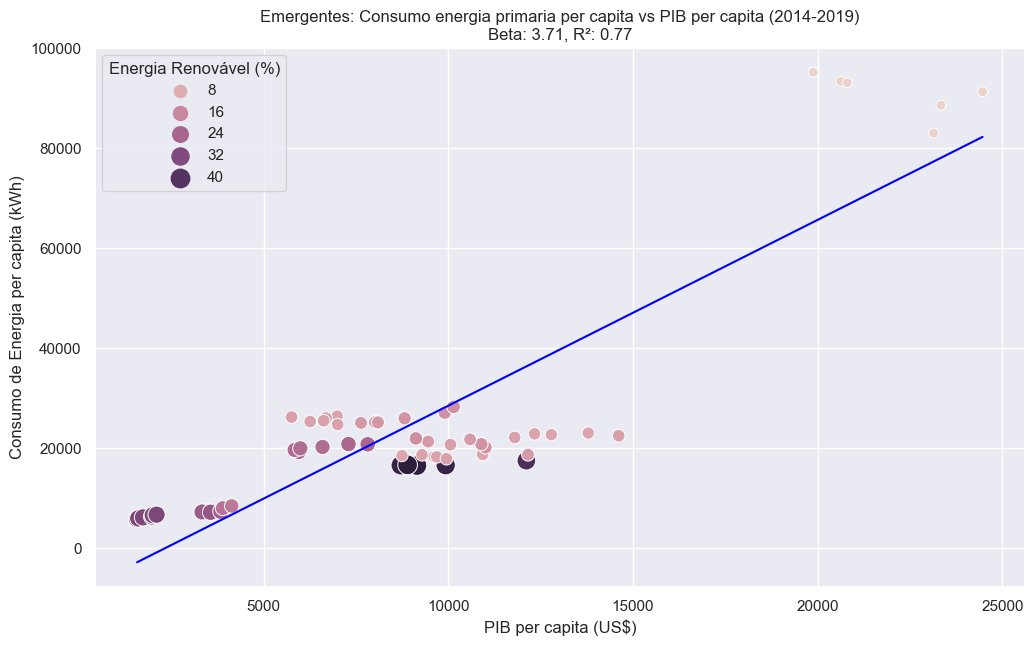

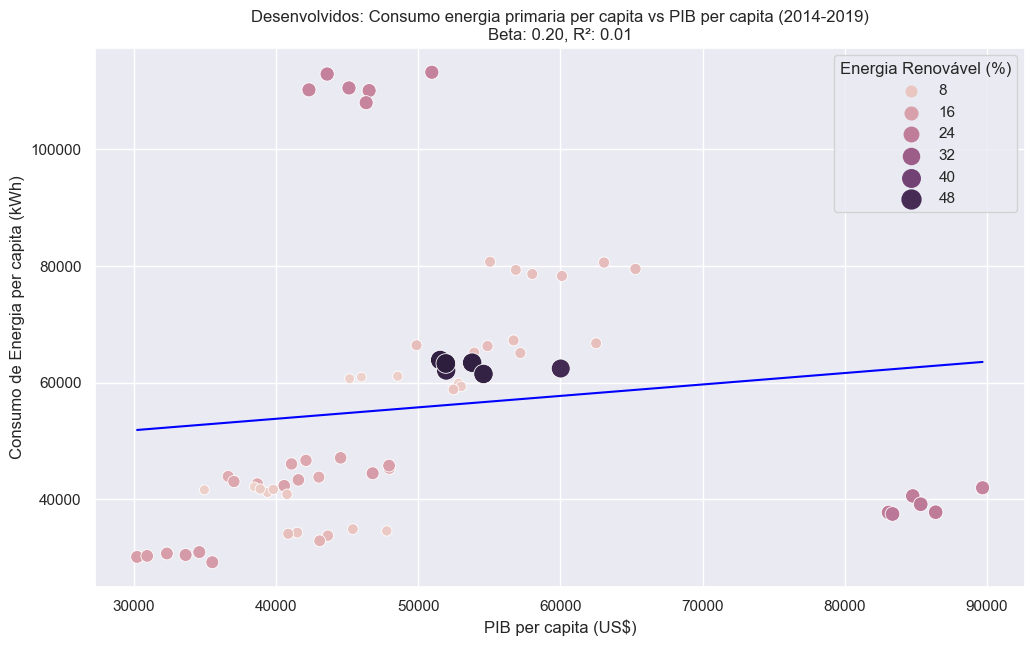

In [96]:
# Função para plotar a regressão, onde data será o dataframe e grupo, o grupo requerido
def plot_regression(data, grupo):
    X = data[[x_var]]
    y = data[y_var]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    beta = model.coef_[0]
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=data, x=X[x_var], y=y, hue='Renováveis %', size='Renováveis %', sizes=(50, 200))
    sns.lineplot(x=X[x_var], y=y_pred, color='blue')
    plt.title(f'{grupo}: {y_var} vs {x_var} (2014-2019)\nBeta: {beta:.2f}, R²: {r2:.2f}')
    plt.xlabel('PIB per capita (US$)')
    plt.ylabel('Consumo de Energia per capita (kWh)')
    plt.legend(title='Energia Renovável (%)')
    plt.show()

# Plotando regressão para países emergentes
data_emergentes = data_filtrada[data_filtrada['Status'] == 'Emergente']
plot_regression(data_emergentes, 'Emergentes')

# Plotando regressão para países desenvolvidos
data_desenvolvidos = data_filtrada[data_filtrada['Status'] == 'Desenvolvido']
plot_regression(data_desenvolvidos, 'Desenvolvidos')

O efeito renda no consumo de energia é muito superior em países emergentes, isso pode ser interpretado como um icremente de infraestrutura necessário para suprir o aumento da demanda nos emergentes. Mas também pode ser um efeito da mundança de agendas mais preocupadas com o meio ambiente. 

O R² dos desenvolvidos é baixissimo, indicando que a regressão explica muito pouco o efeito. Já em emergentes, o R² é muito superior. Em suma, é apresentado um cenário, no qual países têm um efeito renda no consumo de energia que é crescente até certo nível, mas depois vai decaindo.

**Hipótese B**

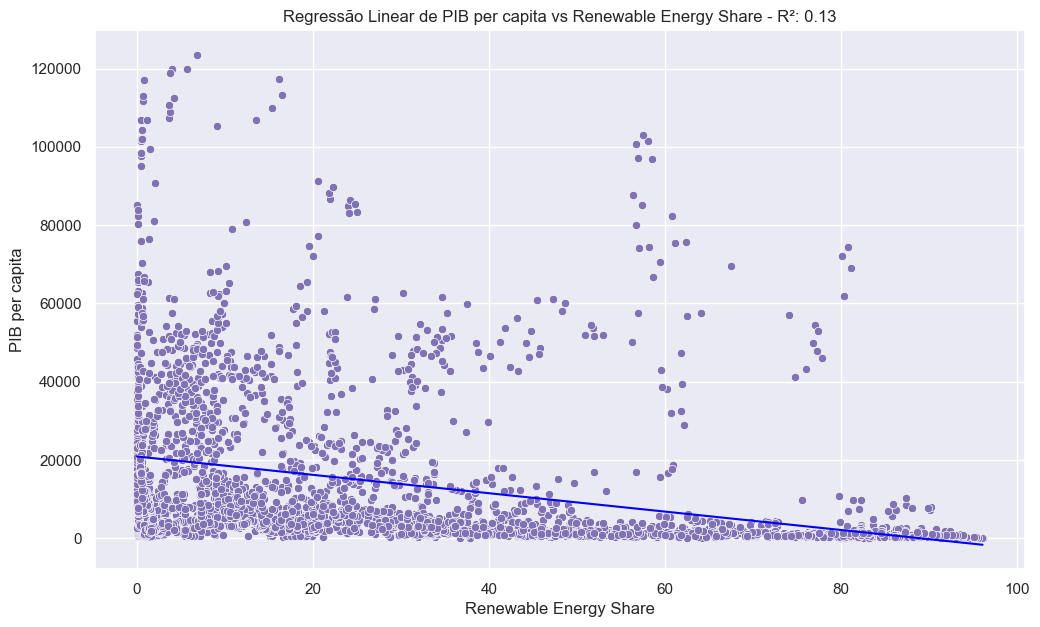

In [97]:
# Variável independente
x_var = 'Renováveis %'

# Variáveis dependentes
y_vars = ['PIB per capita']

# Regressão Linear Univarida para cada variável dependente
for y_var in y_vars:
    # Preparando os dados
    data_filtrada = data[[x_var, y_var]].dropna()
    X = data_filtrada[[x_var]]
    y = data_filtrada[y_var]

    # Criando e ajustando o modelo
    model = LinearRegression()
    model.fit(X, y)

    # Fazendo previsões
    y_pred = model.predict(X)

    # Calculando R²
    r2 = r2_score(y, y_pred)

    # Plotando gráfico de dispersão com linha de regressão
    
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=X[x_var], y=y, color='m')
    sns.lineplot(x=X[x_var], y=y_pred, color='blue')
    plt.title(f'Regressão Linear de {y_var} vs Renewable Energy Share - R²: {r2:.2f}')
    plt.xlabel('Renewable Energy Share')
    plt.ylabel(y_var)
    plt.show()

Uma primeira tentativa de tentar correlacionar o desenvolvimento econômico, medido pelo nível de renda, e energias renováveis, com base na base de dados global, parece nos indicar, de maneira um tanto imprecisa e dispersa, uma relação negativa, conforme é possível ver no gráfico.

Ou seja: quanto maior o nível de energias limpas na matriz, menor a renda.

Isto, a princípio, desafia a nossa hipótese, já que não parece haver uma tendência indicando que a ampliação na participação de energias renováveis amplia a renda ou o desenvolvimento econômico, tanto quanto o inverso: ampliar a renda parece reduzir o peso das renováveis.

A pergunta é: esta tendência vale para qualquer economia, ou ela varia de acordo com diferentes perfis de países?

Direcionamos nossa observação primeiramente aos emergentes

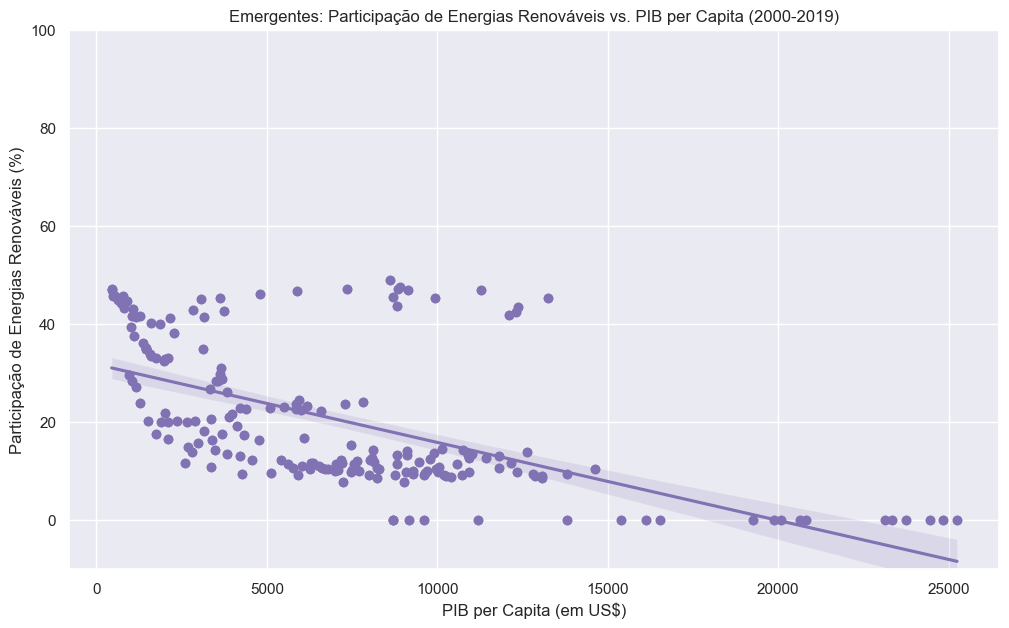

In [98]:
# Grafico de dispersão dos emergentes
plt.figure(figsize=(12, 7))
sns.regplot(x='PIB per capita', y='Renováveis %', data=emergentes, color='m')

plt.scatter(emergentes['PIB per capita'], emergentes['Renováveis %'], color='m')
plt.title('Emergentes: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(-10, 100)
plt.grid(True)
plt.show()

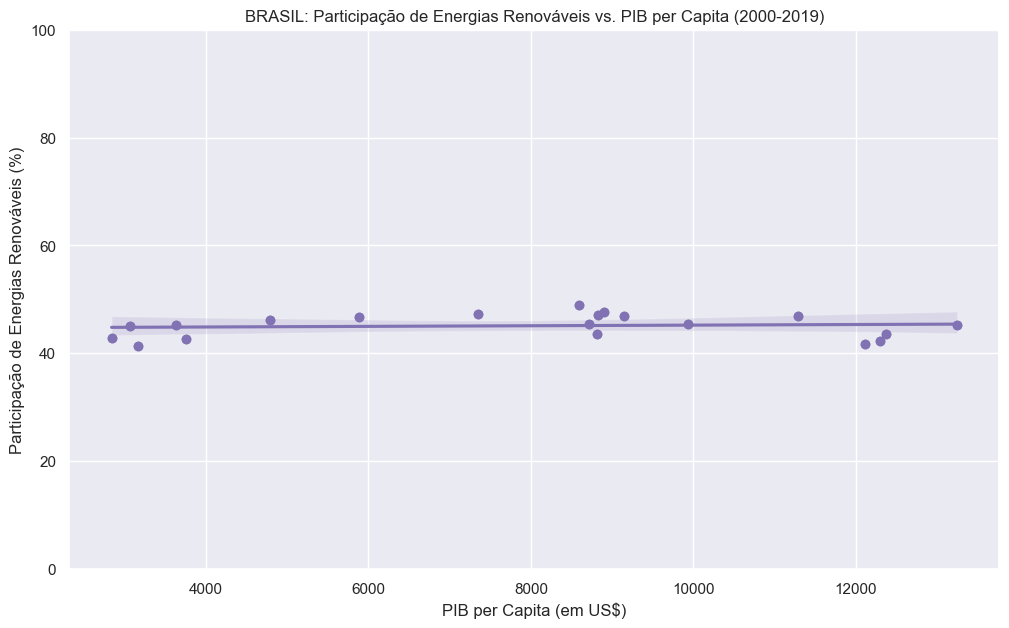

In [99]:
# Observação Brasil
Brasil = data[data['Pais']=='Brazil'].reset_index(drop=True)

plt.figure(figsize=(12, 7))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Brasil, color='m')

plt.scatter(Brasil['PIB per capita'], Brasil['Renováveis %'], color='m')
plt.title('BRASIL: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

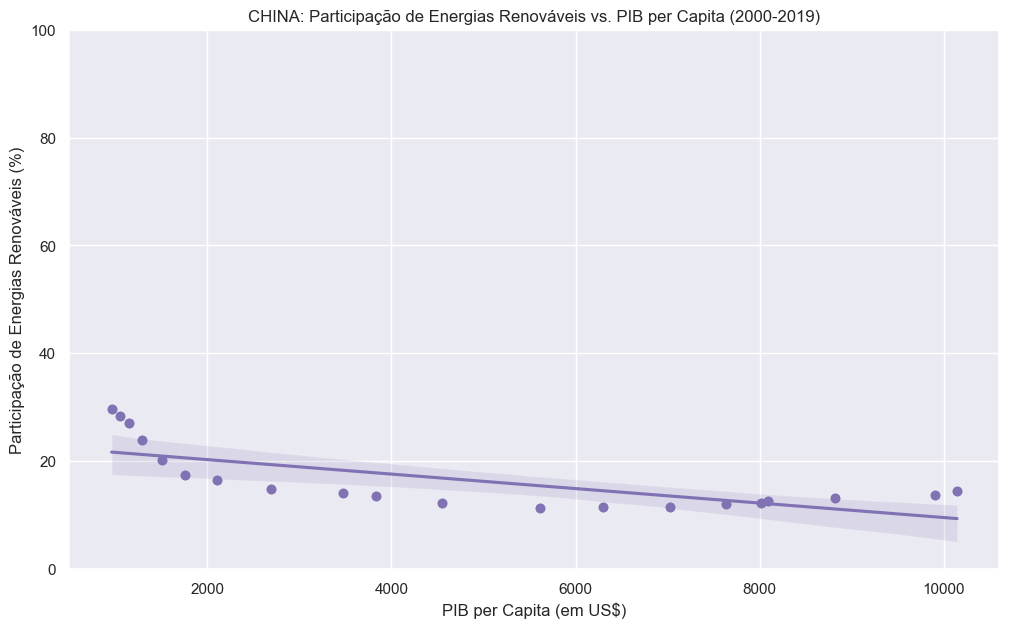

In [100]:
# Observação da China
china = data[data['Pais']=='China'].reset_index(drop=True)

plt.figure(figsize=(12, 7))
sns.regplot(x='PIB per capita', y='Renováveis %', data=china, color='m')

plt.scatter(china['PIB per capita'], china['Renováveis %'], color='m')
plt.title('CHINA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

**2. Verificando a hipótese para países desenvolvidos**

Vamos agora fazer o oposto: selecionar países de alto nível de renda e ver se o comportamento entre evolção do PIB per capita e do consumo de energias renováveis é igual.

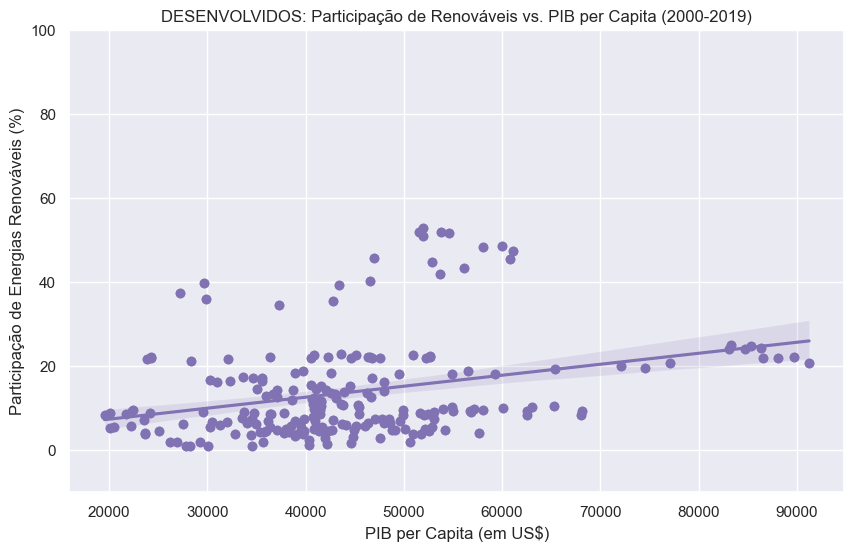

In [101]:
# Observação da Desenvolvidos
plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=desenvolvidos, color='m')

plt.scatter(desenvolvidos['PIB per capita'], desenvolvidos['Renováveis %'], color='m')
plt.title('DESENVOLVIDOS: Participação de Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(-10, 100)
plt.grid(True)
plt.show()

Veja que para um grupo de economias mais ricas, a correlação se inverte em relação ao que acontece nos emergentes: quanto maior o PIB per capita, maior, também, fica o uso de energias renováveis na matriz energética.

Vamos ver algunas casos particulares, como o de países que têm amplo uso de renováveis e que ampliaram bastante sua base nas últimas décadas. Caso, por exemplo, da França, Alemanha e Suécia, como se vê na tabela:

In [102]:
# Vejamos quais possuem características desejadas
desenvolvidos[desenvolvidos['Ano'].isin([2000,2019])].reset_index(drop=True)

,Pais,Ano,Consumo energia primaria per capita,PIB per capita,Renováveis %
0,Australia,2000,68632.960,21697.70848,8.42
1,Australia,2019,66263.540,54875.28596,10.13
2,Canada,2000,118875.336,24271.00206,22.04
3,Canada,2019,107980.760,46338.34096,22.11
4,France,2000,52966.594,22364.02939,9.32
5,France,2019,42326.785,40578.64429,15.53
6,Germany,2000,48903.700,23635.92922,3.70
7,Germany,2019,44467.746,46794.89929,17.17
8,Italy,2000,36851.285,20087.59199,5.12
9,Italy,2019,30464.062,33641.63375,17.27


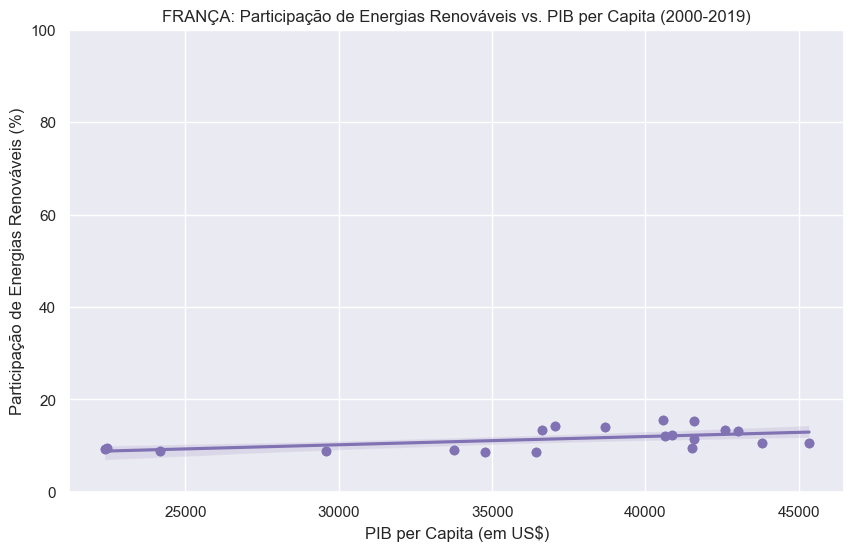

In [103]:
# Observação da França
franca = data[data['Pais']=='France'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=franca, color='m')

plt.scatter(franca['PIB per capita'], franca['Renováveis %'], color='m')
plt.title('FRANÇA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

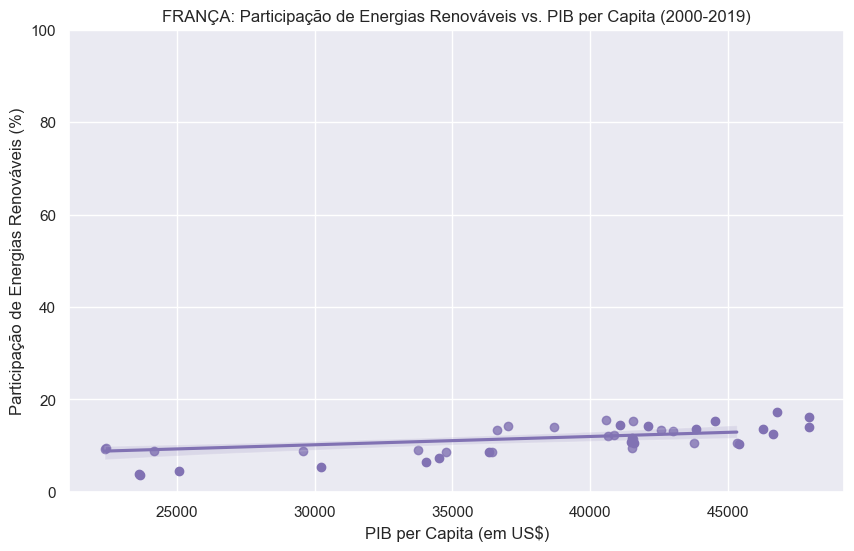

In [104]:
# Observação da Alemanha
alemanha = data[data['Pais']=='Germany'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=franca, color='m')

plt.scatter(alemanha['PIB per capita'], alemanha['Renováveis %'], color='m')
plt.title('FRANÇA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

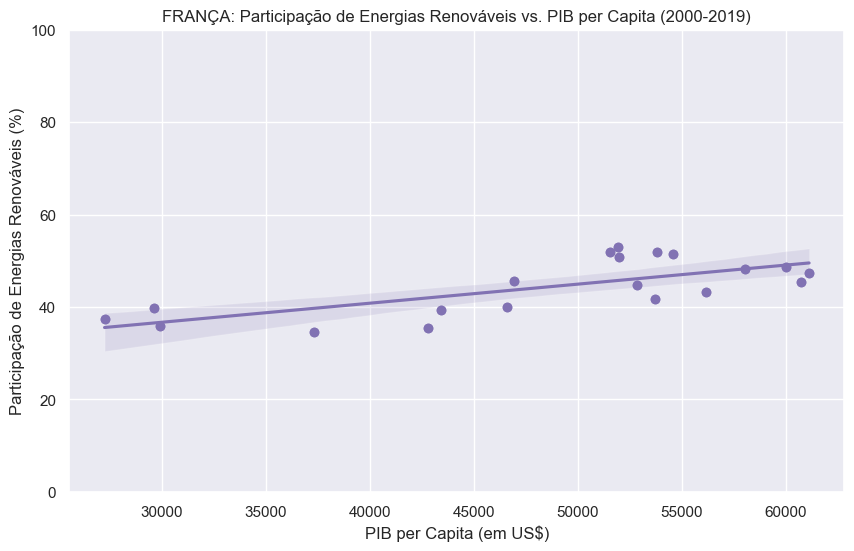

In [105]:
# Observação da Suécia
suecia = data[data['Pais']=='Sweden'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=suecia, color='m')

plt.scatter(suecia['PIB per capita'], suecia['Renováveis %'], color='m')
plt.title('FRANÇA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# 4. Verificação da Hipótese - Análise Temporal

**Hipótese A**

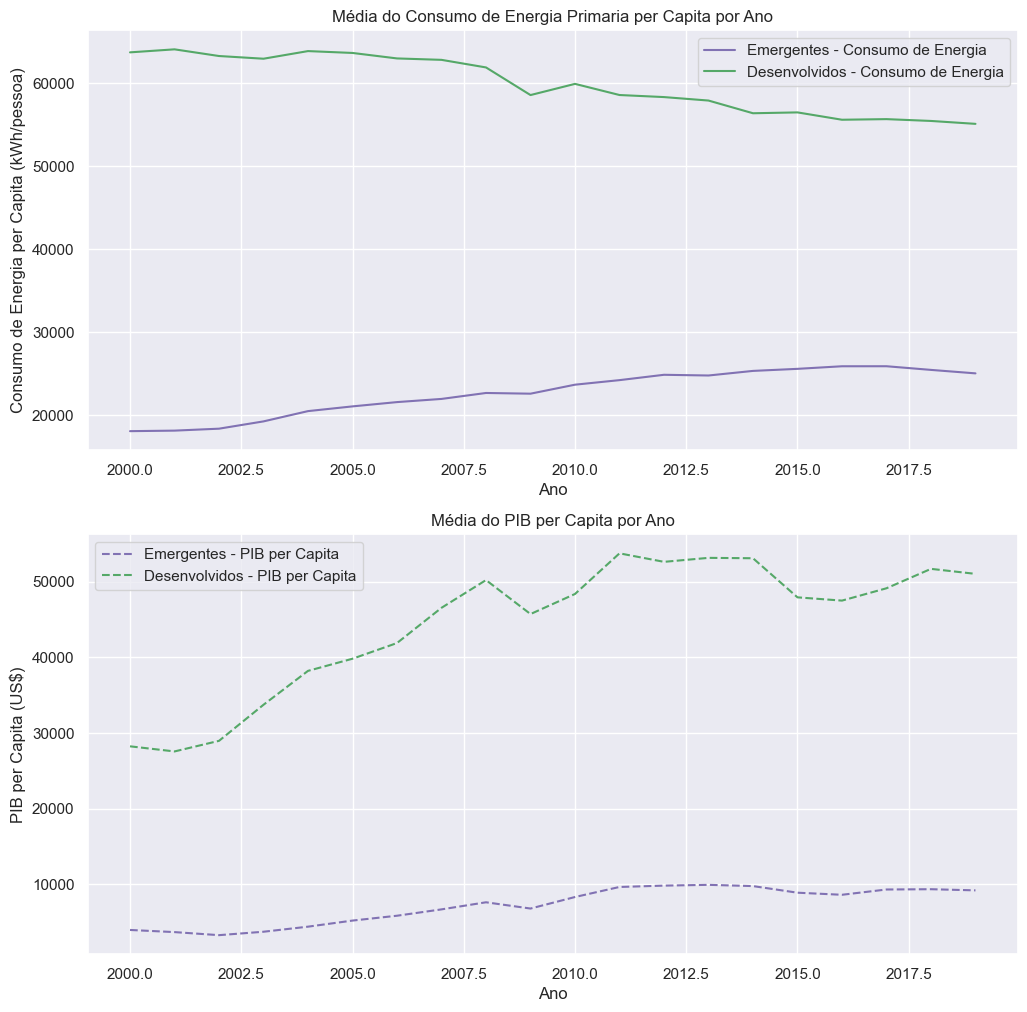

In [106]:
# Filtrando os dados para emergentes e desenvolvidos
data_emergentes = data[data['Pais'].isin(emergentes_list)]
data_desenvolvidos = data[data['Pais'].isin(desenvolvidos_list)]

# Calculando a média do PIB por ano para cada grupo
media_pib_emergentes = data_emergentes.groupby('Ano')['PIB per capita'].mean()
media_pib_desenvolvidos = data_desenvolvidos.groupby('Ano')['PIB per capita'].mean()

# Calculando a média do consumo de energia por ano para cada grupo
media_consumo_emergentes = data_emergentes.groupby('Ano')['Consumo energia primaria per capita'].mean()
media_consumo_desenvolvidos = data_desenvolvidos.groupby('Ano')['Consumo energia primaria per capita'].mean()

# Criando o gráfico com dois subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Gráfico para o consumo de energia per capita
ax[0].plot(media_consumo_emergentes, label='Emergentes - Consumo de Energia', color='m')
ax[0].plot(media_consumo_desenvolvidos, label='Desenvolvidos - Consumo de Energia', color='g')
ax[0].set_title('Média do Consumo de Energia Primaria per Capita por Ano')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Consumo de Energia per Capita (kWh/pessoa)')
ax[0].legend()
ax[0].grid(True)

# Gráfico para o PIB per capita
ax[1].plot(media_pib_emergentes, label='Emergentes - PIB per Capita', color='m', linestyle='--')
ax[1].plot(media_pib_desenvolvidos, label='Desenvolvidos - PIB per Capita', color='g', linestyle='--')
ax[1].set_title('Média do PIB per Capita por Ano')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('PIB per Capita (US$)')
ax[1].legend()
ax[1].grid(True)

plt.show()
plt.show()

A análise feita na regressão é confirmada no gráfico temporal, para os países emergentes, as oscilações seguem bem próximas, enquanto para os desenvolvidos as variáveis possuem comportamentos assíncronos, com uma leve tendência de aproximação a partir de 2010.

**Hipótese B**

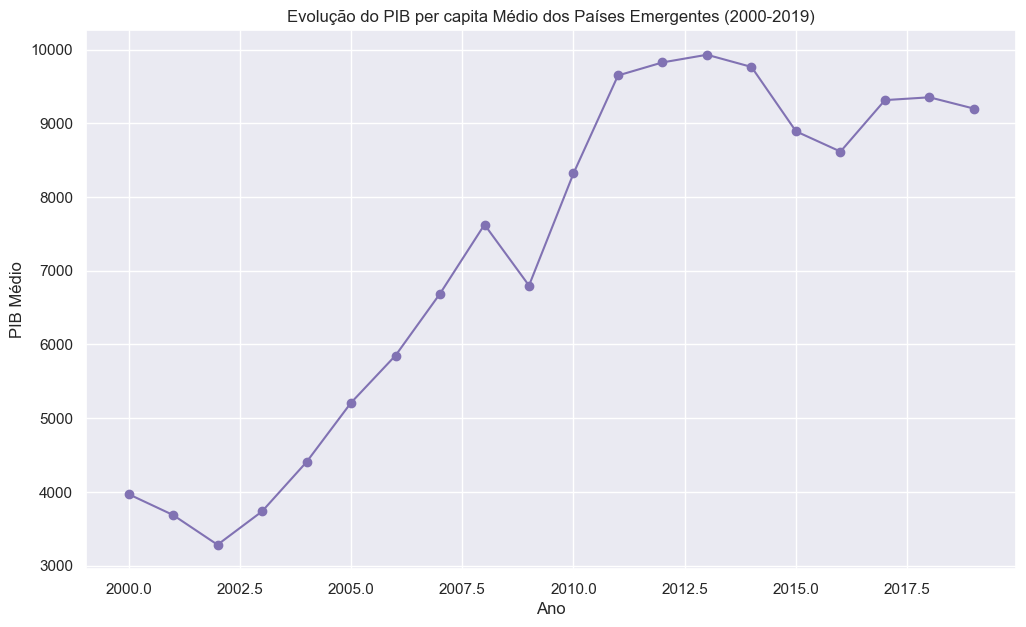

In [107]:
# Calculando o PIB per capita médio do grupo por ano
pib_medio = emergentes.groupby('Ano')['PIB per capita'].mean()

# Calculando a % de renováveis média por ano
renovaveis_media = emergentes.groupby('Ano')['Renováveis %'].mean()

# Plotar o gráfico da evolução do PIB
plt.figure(figsize=(12, 7))
plt.plot(pib_medio.index, pib_medio.values, marker='o', linestyle='-', color='m')
plt.title('Evolução do PIB per capita Médio dos Países Emergentes (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('PIB Médio')
plt.grid(True)
plt.show()


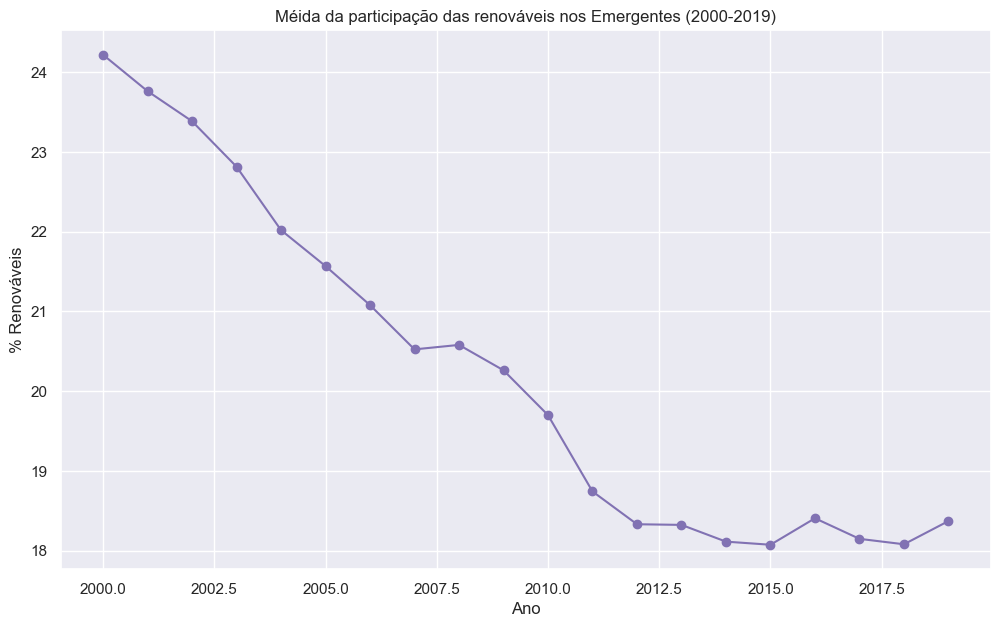

In [108]:
# Plotar o gráfico da evolução das renováveis
plt.figure(figsize=(12, 7))
plt.plot(renovaveis_media.index, renovaveis_media.values, marker='o', linestyle='-', color='m')
plt.title('Méida da participação das renováveis nos Emergentes (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('% Renováveis')
plt.grid(True)
plt.show()

Note que, na média deste grupo de países, há uma avanço enorme de renda no período. O oposto, entretanto, aconteceu com o uso das energias limpas: a participação delas despencou.

De fato, um gráfico de dispersão correlacionando estas duas variáveis para esse grupo mostra uma correlação negativa entre elas: ou seja, uma cai quando a outra avança, e vice-versa.

# 5. Conclusões

A partir dos dados analisados, constata-se uma relação direta entre o consumo de energia e o Produto Interno Bruto (PIB) per capita. Observa-se que, à medida que a renda de um país aumenta, o uso de energia também tende a crescer. Este fenômeno é particularmente evidente em nações com renda mais baixa, onde um aumento no PIB per capita está frequentemente acompanhado de um significativo incremento no consumo energético. Este padrão sugere que, para esses países, o desenvolvimento econômico e a elevação do padrão de vida estão intrinsecamente ligados ao aumento da demanda por energia.

No entanto, a relação entre o crescimento da renda e a evolução na participação de fontes de energia renováveis no consumo total de energia de um país não segue uma tendência clara e unificada. Notavelmente, em economias com renda média a baixa, observa-se uma correlação negativa: países que progrediram da faixa de renda baixa para a média, como muitos dos emergentes em nossa amostra, demonstraram uma redução proporcional no uso de energias renováveis. Esse fenômeno pode estar associado ao fato de que muitas fontes renováveis, particularmente tecnologias mais recentes como a eólica e a solar, exigem investimentos substanciais em pesquisa, desenvolvimento e equipamentos avançados. Inicialmente, tais fontes podem ser mais dispendiosas e complexas do que alternativas convencionais de fácil acesso, como o carvão e o petróleo.

Em contraste, países com economias mais desenvolvidas exibem uma tendência oposta: o aumento da renda parece correlacionar-se com um maior uso de energias renováveis. Isso pode ser atribuído ao investimento significativo desses países em indústria, tecnologia e pesquisa. Esse investimento tem um impacto positivo em diversos aspectos econômicos, incluindo a geração de empregos qualificados, a melhoria da pauta exportadora e o saldo comercial. Para análises futuras, seria proveitoso incorporar variáveis como geração de emprego, investimento em pesquisa e desenvolvimento (P&D) e evolução das exportações para compreender melhor como o aumento das energias renováveis na matriz energética de um país influencia a robustez de sua economia.
